Given an image of a face, detect the face, draw a bounding box, and generate an embedding unique to the face

In [2]:
from deepface import DeepFace
import cv2
import os
import shutil
# import numpy as np
import matplotlib.pyplot as plt

In [3]:
input_video = "new_video.mov" # Replace with path of input video
output_video = "output_video_clean" 
output_directory = "videoframes"

In [4]:
def create_video(frames, output_name):
    height, width, _ = frames[0].shape
    output_video_path = "{}.mp4".format(output_name)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(output_video_path, fourcc, 50, (width, height)) 

    for frame in frames:
        video.write(frame)
    
    video.release()

In [5]:
# Split video into frames in the videoframes directory
# Runtime: ~60 seconds

# Delete directory if it already exists and make a new one
if os.path.exists(output_directory):
   shutil.rmtree(output_directory)
os.makedirs(output_directory)

vidcap = cv2.VideoCapture(input_video)

if vidcap.isOpened():
  frame_count = 0

  while True:
      ret, frame = vidcap.read()
      
      if not ret:
          break

      # Save each frame as an image in the output folder
      frame_name = f"frame_{frame_count:04d}.jpg"
      frame_path = os.path.join(output_directory, frame_name)
      cv2.imwrite(frame_path, frame)

      frame_count += 1

  vidcap.release()

  print(f"Video frames saved in '{output_directory}'")

OpenCV: Couldn't read video stream from file "new_video.mov"


(-0.5, 679.5, 424.5, -0.5)

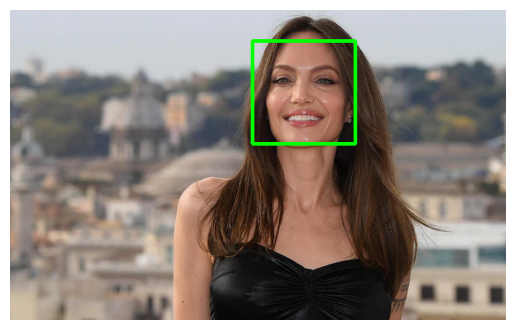

In [74]:
video_frames = []

for filename in sorted(os.listdir(output_directory)):
    print(filename)
    frame_path = os.path.join(output_directory, filename)
    
    if os.path.isfile(frame_path):  # Check if it's a file (not a subdirectory)
        embedding_objs = DeepFace.represent(img_path = "img.jpeg")
        embedding = embedding_objs[0]["embedding"]

        #face detection and alignment

        img_path = 'img2.jpeg'
        img = cv2.imread(img_path)

        face_objs = DeepFace.extract_faces(img_path = img_path, 
                target_size = (224, 224)
        )
        face = face_objs[0]['facial_area']
        x,y,w,h = face['x'],face['y'],face['w'],face['h']
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img_rgb)
        plt.axis('off')

        video_frames.append(img)

In [ ]:
# Compile video from saved output frames
create_video(video_frames, output_video)